In [ ]:
import pandas as pd
df_links= pd.read_csv("network links.csv")
df_links

,link_id,init_node,term_node,length
0,1,A,B,6
1,2,B,C,5
2,3,A,D,1
3,4,D,B,2
4,5,B,E,2
5,6,D,E,1
6,7,E,C,5
7,8,B,A,6
8,9,C,B,5
9,10,D,A,1


In [13]:
inputLinks = df_links.copy()

In [24]:
# the first function should get the link dataframe and return the list of nodes
def createNodeList(inputLinks):
    nodesSet = set()
    for index, row in inputLinks.iterrows():
        nodesSet.add(row['init_node'])
        nodesSet.add(row['term_node'])
    nodes = sorted(list(nodesSet))
    return nodes

In [25]:
# convert the node set into list
nodes = list(nodesSet)

In [26]:
nodes

['D', 'A', 'C', 'B', 'E']

In [27]:
# sort the node list if needed
nodes.sort()

In [28]:
nodes

['A', 'B', 'C', 'D', 'E']

In [29]:
# now lets write a function that gets the link dataframe and creates the network adjacency lists
def createAdjacencyList(inputLinks):
    adjacencyLists = {}
    for index, row in inputLinks.iterrows():
        fromNode = row['init_node']
        if fromNode not in adjacencyLists:
            adjacencyLists[fromNode] = []
        adjacencyLists[fromNode].append(index)
    return adjacencyLists

In [30]:
adjacencyListTest = createAdjacencyList(linksDataFrame)
adjacencyListTest

{'A': [0, 2],
 'B': [1, 4, 7, 10],
 'D': [3, 5, 9],
 'E': [6, 11, 12],
 'C': [8, 13]}

In [31]:
# now lets write the Dijkstra function that gets the input link dataframe and an origin node
# returns the shortest path tree from that origin
def myDijkstra(inputLinks, origin):
    nodes = createNodeList(inputLinks)
    adjacencyLists = createAdjacencyList(inputLinks)
    labels = {node: float('inf') for node in nodes}
    predecessors = {}
    labels[origin] = 0
    predecessors[origin] = -1
    searchList = nodes.copy()

    while searchList:
        smallestLabelNode = min(searchList, key=lambda x: labels[x])
        searchList.remove(smallestLabelNode)

        for i in adjacencyLists.get(smallestLabelNode, []):
            toNode = inputLinks["term_node"][i]
            length = inputLinks["length"][i]
            if labels[toNode] > labels[smallestLabelNode] + length:
                labels[toNode] = labels[smallestLabelNode] + length
                predecessors[toNode] = smallestLabelNode

    return labels, predecessors

In [32]:
# Example execution
originNode = "A"
labels, predecessors = myDijkstra(inputLinks, originNode)

In [33]:
shortestPathTree

[{'D': 1, 'A': 0, 'C': 7, 'B': 3, 'E': 2},
 {'A': -1, 'B': 'D', 'D': 'A', 'E': 'D', 'C': 'E'}]

In [35]:
# Reconstruct path from destination
destinationNode = "C"
tempNode = destinationNode
while True:
    print(tempNode, labels[tempNode], "miles")
    if tempNode == originNode:
        break
    tempNode = predecessors[tempNode]

C 7 miles
E 2 miles
D 1 miles
A 0 miles


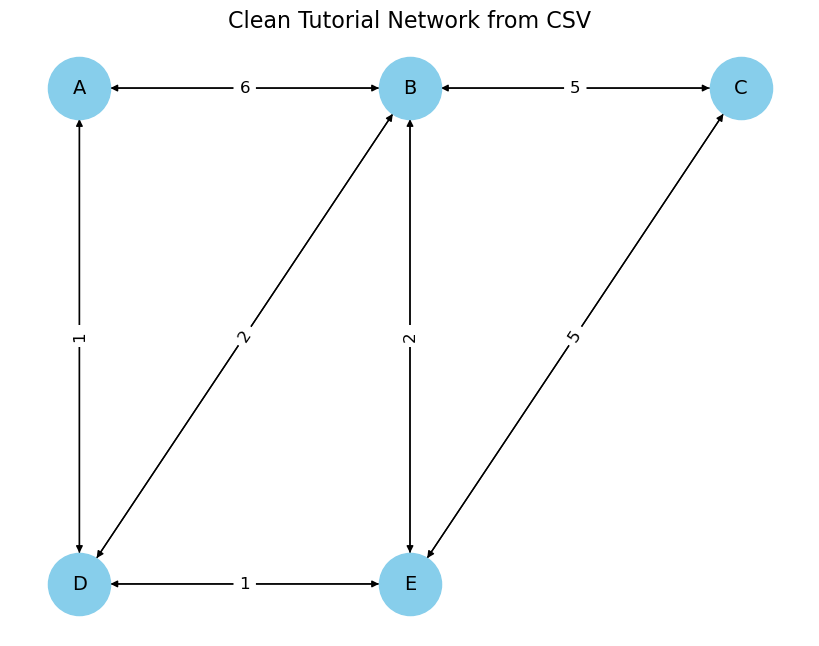

In [43]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read your CSV file
df = pd.read_csv("tutorial network links.csv")

# Step 2: Create a directed graph
G = nx.DiGraph()

# Step 3: Add edges using data from CSV
for _, row in df.iterrows():
    G.add_edge(row['init_node'], row['term_node'], weight=row['length'])

# Step 4: Assign fixed positions to nodes for neat layout
pos = {
    'A': (0, 2),
    'B': (2, 2),
    'C': (4, 2),
    'D': (0, 0),
    'E': (2, 0),
}

# Step 5: Draw graph with neat layout
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=14, arrows=True)

# Step 6: Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=12)

plt.title("Clean Tutorial Network from CSV", fontsize=16)
plt.axis("off")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

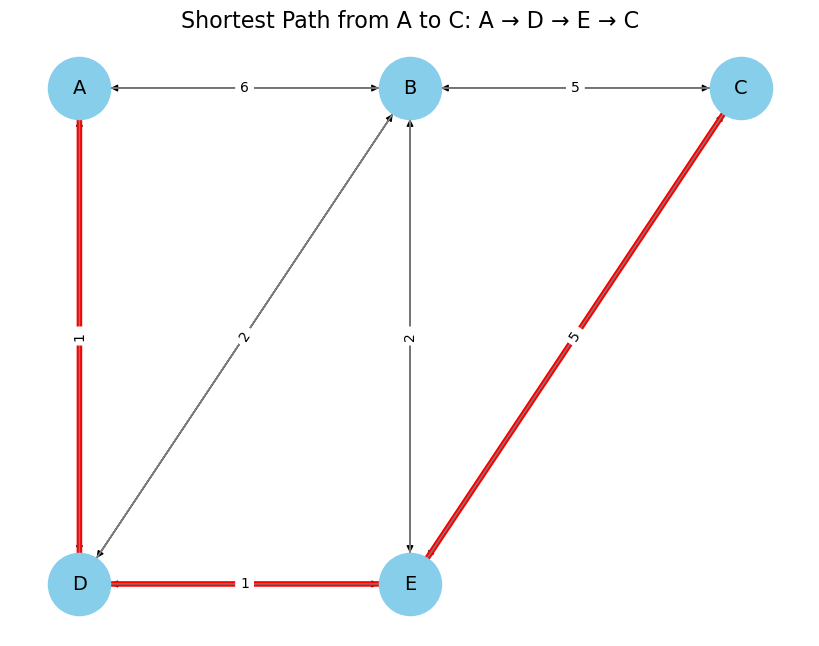

In [51]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load CSV (adjust path as needed)
df = pd.read_csv("tutorial network links.csv")

# Create directed graph
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row["init_node"].strip(), row["term_node"].strip(), weight=row["length"])

# Get shortest path
shortest_path = nx.dijkstra_path(G, source="A", target="C", weight="weight")
shortest_path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))

# Manual positions to match tutorial diagram
pos = {
    'A': (0, 2),
    'B': (2, 2),
    'C': (4, 2),
    'D': (0, 0),
    'E': (2, 0),
}

# Draw base graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=14)

# ✅ Correct coloring: red if (u,v) is in shortest_path_edges
nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='red', width=4)
nx.draw_networkx_edges(G, pos, edgelist=[e for e in G.edges() if e not in shortest_path_edges], edge_color='gray', width=1)

# Edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

# Show result
plt.title(f"Shortest Path from A to C: {' → '.join(shortest_path)}", fontsize=16)
plt.axis("off")
plt.show()

In [50]:
# Compute and print the shortest path
shortest_path = nx.dijkstra_path(G, source="A", target="C", weight="weight")
print("Shortest path:", shortest_path)

# Build edge list from the shortest path
shortest_path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))
print("Shortest path edges:", shortest_path_edges)

# Print all actual graph edges for comparison
print("Graph edges:")
for u, v in G.edges():
    print(f"({repr(u)}, {repr(v)})")  # Use repr to reveal hidden whitespace

Shortest path: ['A', 'D', 'E', 'C']
Shortest path edges: [('A', 'D'), ('D', 'E'), ('E', 'C')]
Graph edges:
('A', 'B')
('A', 'D')
('B', 'C')
('B', 'E')
('B', 'A')
('B', 'D')
('C', 'B')
('C', 'E')
('D', 'B')
('D', 'E')
('D', 'A')
('E', 'C')
('E', 'B')
('E', 'D')


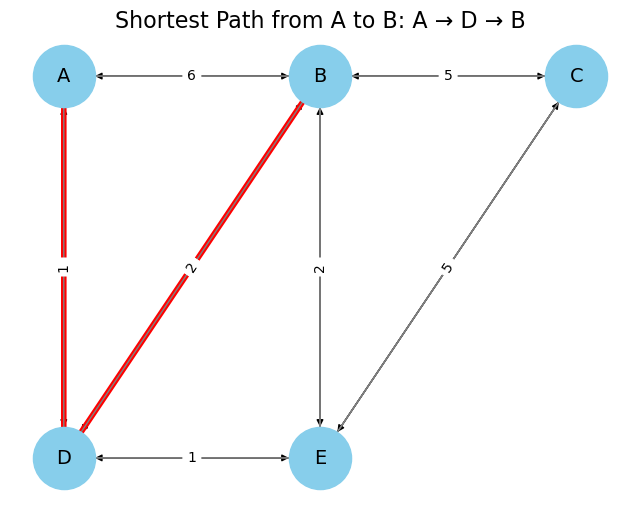

In [64]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Read your CSV
df = pd.read_csv("tutorial network links.csv")
df['init_node'] = df['init_node'].astype(str).str.strip()
df['term_node'] = df['term_node'].astype(str).str.strip()

# Create graph
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['init_node'], row['term_node'], weight=row['length'])

# Fixed layout
pos = {'A': (0, 2), 'B': (2, 2), 'C': (4, 2), 'D': (0, 0), 'E': (2, 0)}

# Destination nodes (from A to each other node)
destinations = [node for node in G.nodes() if node != 'A']

# Compute all shortest paths from A
paths = [nx.dijkstra_path(G, source='A', target=dest, weight='weight') for dest in destinations]
path_edges = [list(zip(p[:-1], p[1:])) for p in paths]

# Setup animation
fig, ax = plt.subplots(figsize=(8, 6))

def update(frame):
    ax.clear()
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=14, ax=ax)
    
    # Red edges for current path
    nx.draw_networkx_edges(G, pos, edgelist=path_edges[frame], edge_color='red', width=4, ax=ax)
    
    # Grey for rest
    non_path_edges = [e for e in G.edges() if e not in path_edges[frame]]
    nx.draw_networkx_edges(G, pos, edgelist=non_path_edges, edge_color='gray', width=1, ax=ax)
    
    # Edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', ax=ax)

    # Title
    path_str = " → ".join(paths[frame])
    ax.set_title(f"Shortest Path from A to {paths[frame][-1]}: {path_str}", fontsize=16)
    ax.axis("off")

ani = FuncAnimation(fig, update, frames=len(paths), interval=2000, repeat=True)
ani.save("shortest_paths.gif", writer="pillow")  # or "shortest_paths.mp4", writer="ffmpeg"

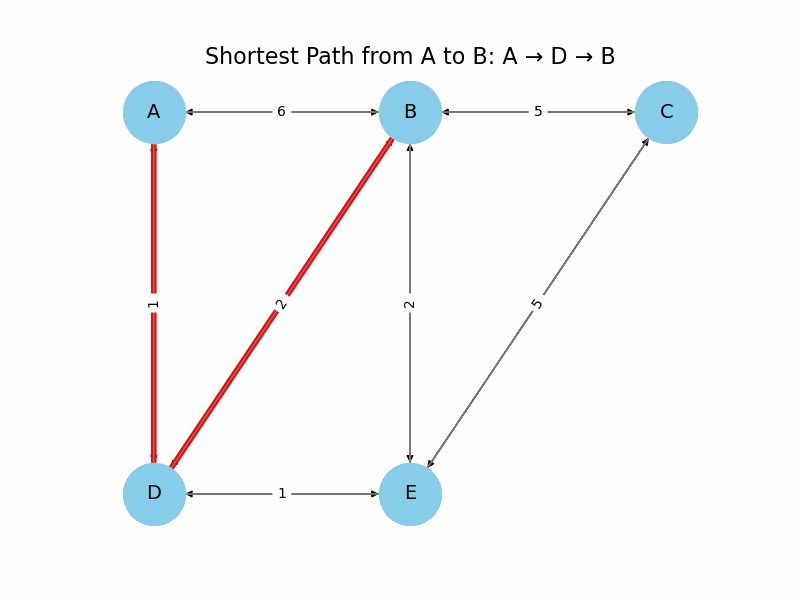

In [65]:
from IPython.display import Image
Image(filename="shortest_paths.gif")